In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

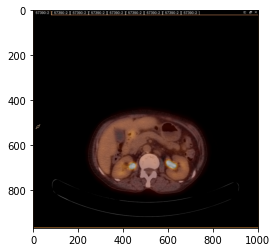

In [2]:
img = cv2.imread('I80.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

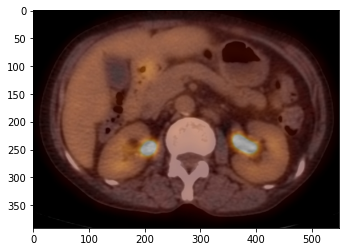

In [3]:
roi = cv2.selectROI(img)
cv2.destroyAllWindows()
crop = img[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

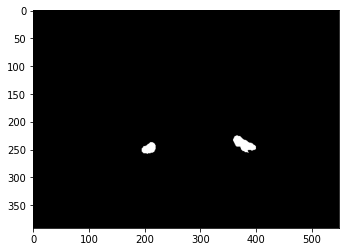

In [4]:
blueCrop = cv2.split(crop)[0]
thr145blue = cv2.threshold(blueCrop, 145, 255, cv2.THRESH_BINARY)[1]
plt.imshow(cv2.cvtColor(thr145blue, cv2.COLOR_BGR2RGB))

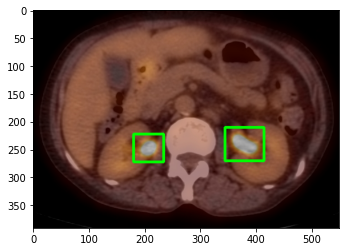

In [6]:
from typing import List, Tuple

def get_min_max_loc(points: np.ndarray) -> Tuple[int, int, int, int]:
    y_min = points[:, 0, 0].min()
    y_max = points[:, 0, 0].max()
    x_min = points[:, 0, 1].min()
    x_max = points[:, 0, 1].max()

    return x_min, y_min, x_max, y_max

contours= cv2.findContours(thr145blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
#cv2.drawContours(crop, contours, -1, (0, 255, 0), 3)

rects: List[Tuple[int, int]] = [get_min_max_loc(c) for c in contours]

for rec in rects:
    cv2.rectangle(crop,
                  pt1=(rec[1] - 15, rec[0] - 15),  # (y_min, x_min)
                  pt2=(rec[3] + 15, rec[2] + 15),  # (y_max, x_max)
                  color=(0, 255, 0),
                  thickness=3)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))